In [ ]:
df_with_dummies = pd.get_dummiesimport pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/4210 final project/SBAnational.csv')
pd.set_option('display.max_columns', None)


/tmp/ipython-input-137805301.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/4210 final project/SBAnational.csv')


In [ ]:
df.isnull().sum()


,0
LoanNr_ChkDgt,0
Name,14
City,30
State,14
Zip,0
Bank,1559
BankState,1566
NAICS,0
ApprovalDate,0
ApprovalFY,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [ ]:
df = df.dropna(subset=['MIS_Status'])


In [ ]:

def change_year(x):
    if x['ApprovalFY'] == '1976A':
        return 1976
    else:
        return int(x['ApprovalFY'])

df.loc[:, 'ApprovalFY'] = df.apply(change_year, axis=1)

In [ ]:
df['ApprovalFY'].unique()
df.loc[:, 'ApprovalFY'] = df['ApprovalFY'].astype(int)

In [ ]:
#change data types
df['GrAppv'] = df['GrAppv'].replace('[\$,]', '', regex=True).astype(float)
df['SBA_Appv'] = df['SBA_Appv'].replace('[\$,]', '', regex=True).astype(float)
df['DisbursementGross'] = df['DisbursementGross'].replace('[\$,]', '', regex=True).astype(float)
df['BalanceGross'] = df['BalanceGross'].replace('[\$,]', '', regex=True).astype(float)
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-4017951812.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['GrAppv'] = df['GrAppv'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-4017951812.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['SBA_Appv'] = df['SBA_Appv'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-4017951812.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['DisbursementGross'] = df['DisbursementGross'].replace('[\$,]', '', regex=True).astype(float)
/tm

In [ ]:
# Step 1: Convert NAICS to string (if it's not already) and extract the first two digits
df['NAICS_prefix'] = df['NAICS'].astype(str).str[:2]

# Step 2: Create a mapping dictionary for the first two digits (adjust the mapping as needed)
naics_mapping = {
    '11': 'Agriculture, Forestry, Fishing and Hunting',
    '21': 'Mining, Quarrying, and Oil and Gas Extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale Trade',
    '44': 'Retail Trade',
    '45': 'Retail Trade',
    '48': 'Transportation and Warehousing',
    '49': 'Transportation and Warehousing',
    '51': 'Information',
    '52': 'Finance and Insurance',
    '53': 'Real Estate and Rental and Leasing',
    '54': 'Professional, Scientific, and Technical Services',
    '55': 'Management of Companies and Enterprises',
    '56': 'Administrative and Support and Waste Management and Remediation Services',
    '61': 'Educational Services',
    '62': 'Health Care and Social Assistance',
    '71': 'Arts, Entertainment, and Recreation',
    '72': 'Accommodation and Food Services',
    '81': 'Other Services (except Public Administration)',
    '92': 'Public Administration',
    '0': 'Unclassified',
}

# Step 3: Map the first two digits to the corresponding industry
df['NAICS_US_Industry_Title'] = df['NAICS_prefix'].map(naics_mapping)

In [ ]:
def clean_and_convert_dates(df, date_columns):
    for date_column in date_columns:
        if date_column in df.columns:
            # Specify the exact date format to improve parsing performance and consistency
            df[date_column] = pd.to_datetime(df[date_column], format='%d-%b-%y', errors='coerce')

    return df

In [ ]:
# Define columns to clean
columns_to_clean2 = ['DisbursementDate', 'ApprovalDate', 'ChgOffDate']

df = clean_and_convert_dates(df, columns_to_clean2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 897167 entries, 0 to 899163
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   LoanNr_ChkDgt            897167 non-null  int64         
 1   Name                     897153 non-null  object        
 2   City                     897137 non-null  object        
 3   State                    897154 non-null  object        
 4   Zip                      897167 non-null  int64         
 5   Bank                     895661 non-null  object        
 6   BankState                895654 non-null  object        
 7   NAICS                    897167 non-null  int64         
 8   ApprovalDate             897167 non-null  datetime64[ns]
 9   ApprovalFY               897167 non-null  object        
 10  Term                     897167 non-null  int64         
 11  NoEmp                    897167 non-null  int64         
 12  NewExist             

In [ ]:
#keep only cols with n, y, 0, 1
df = df[df['RevLineCr'].isin(['N', 'Y', '0', '1'])]

df['RevLineCr'].value_counts()

,count
RevLineCr,
N,419252
0,257431
Y,200660
1,23


In [ ]:
df.loc[:, 'LowDoc'] = df['LowDoc'].map({'N': 0, 'Y': 1, '0': 0, '1': 1})
df['LowDoc'].value_counts()


,count
LowDoc,
0.0,764923
1.0,107996


In [ ]:
df['FranchiseCode'].value_counts()

,count
FranchiseCode,
1,624158
0,201986
78760,3339
68020,1917
50564,1022
...,...
62855,1
4255,1
88430,1


In [ ]:
#drop col
df = df.drop('FranchiseCode', axis=1)

In [ ]:
#convert to numbers
df['ApprovalMonth'] = df['ApprovalDate'].dt.month
df['DisbursementMonth'] = df['DisbursementDate'].dt.month

df['ApprovalMonth'] = df['ApprovalMonth'].astype('object')  # Convert to object
df['ApprovalMonth'] = df['ApprovalMonth'].map({1: 'Jan', 2: 'Feb',
                                                            3: 'Mar', 4: 'Apr',
                                                            5: 'May', 6: 'Jun',
                                                            7: 'Jul', 8: 'Aug',
                                                            9: 'Sep', 10: 'Oct',
                                                            11: 'Nov', 12: 'Dec'})

df['DisbursementMonth'] = df['DisbursementMonth'].astype('object')  # Convert to object
df['DisbursementMonth'] = df['DisbursementMonth'].map({1: 'Jan', 2: 'Feb',
                                                                    3: 'Mar', 4: 'Apr',
                                                                    5: 'May', 6: 'Jun',
                                                                    7: 'Jul', 8: 'Aug',
                                                                    9: 'Sep', 10: 'Oct',
                                                                    11: 'Nov', 12: 'Dec'})

In [ ]:
df.loc[:, 'MIS_Status'] = df['MIS_Status'].map({'P I F': 1, 'CHGOFF': 0})
df['MIS_Status'] = df['MIS_Status'].astype(int)

df['MIS_Status'].value_counts()

,count
MIS_Status,
1,726481
0,150885


In [ ]:
df['NewExist'].value_counts()

,count
NewExist,
1.0,628183
2.0,248031
0.0,1019


In [ ]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,NAICS_prefix,NAICS_US_Industry_Title,ApprovalMonth,DisbursementMonth
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2.0,0,0,0,N,1.0,NaT,1999-02-28,60000.0,0.0,1,0.0,60000.0,48000.0,45,Retail Trade,Feb,Feb
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2.0,0,0,0,N,1.0,NaT,1997-05-31,40000.0,0.0,1,0.0,40000.0,32000.0,72,Accommodation and Food Services,Feb,May
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1.0,0,0,0,N,0.0,NaT,1997-12-31,287000.0,0.0,1,0.0,287000.0,215250.0,62,Health Care and Social Assistance,Feb,Dec
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,1.0,0,0,0,N,1.0,NaT,1997-06-30,35000.0,0.0,1,0.0,35000.0,28000.0,0,Unclassified,Feb,Jun
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,1.0,7,7,0,N,0.0,NaT,1997-05-14,229000.0,0.0,1,0.0,229000.0,229000.0,0,Unclassified,Feb,May


In [ ]:
# Dictionary to remap column names
new_column_names = {
    'NAICS': 'NAICS_U.S._Industry_Title',
    'ApprovalDate': 'Approval_Date',
    'Term': 'Loan_Term',
    'NoEmp': 'Number_Of_Employees',
    'NewExist': 'Business_Type',
    'UrbanRural': 'Urban_Rural_Status',
    'RevLineCr': 'Revolving_Line_Of_Credit',
    'LowDoc': 'Low_Documentation_Loan_Program',
    'DisbursementGross': 'Disbursement_Gross',
    'BalanceGross': 'Balance_Gross',
    'MIS_Status': 'Loan_Status',
    'GrAppv': 'Bank_Approved_Amount',
    'SBA_Appv': 'SBA_Approved_Amount',
    'isFranchise': 'Franchise_Status',
    'approvalMonth': 'Month_Of_Approval',
    'ApprovalFY': 'Fiscal_Year_Approval',
    'ChgOffPrinGr': 'Charged-off_Amount',
    'NoEmp': 'Number_Of_Employees'
}

df.rename(columns=new_column_names, inplace=True)

In [ ]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS_U.S._Industry_Title,Approval_Date,Fiscal_Year_Approval,Loan_Term,Number_Of_Employees,Business_Type,CreateJob,RetainedJob,Urban_Rural_Status,Revolving_Line_Of_Credit,Low_Documentation_Loan_Program,ChgOffDate,DisbursementDate,Disbursement_Gross,Balance_Gross,Loan_Status,Charged-off_Amount,Bank_Approved_Amount,SBA_Approved_Amount,NAICS_prefix,NAICS_US_Industry_Title,ApprovalMonth,DisbursementMonth
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2.0,0,0,0,N,1.0,NaT,1999-02-28,60000.0,0.0,1,0.0,60000.0,48000.0,45,Retail Trade,Feb,Feb
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2.0,0,0,0,N,1.0,NaT,1997-05-31,40000.0,0.0,1,0.0,40000.0,32000.0,72,Accommodation and Food Services,Feb,May
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1.0,0,0,0,N,0.0,NaT,1997-12-31,287000.0,0.0,1,0.0,287000.0,215250.0,62,Health Care and Social Assistance,Feb,Dec
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,1.0,0,0,0,N,1.0,NaT,1997-06-30,35000.0,0.0,1,0.0,35000.0,28000.0,0,Unclassified,Feb,Jun
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,1.0,7,7,0,N,0.0,NaT,1997-05-14,229000.0,0.0,1,0.0,229000.0,229000.0,0,Unclassified,Feb,May


In [ ]:
print(df['Revolving_Line_Of_Credit'].value_counts())


Revolving_Line_Of_Credit
N    419252
0    257431
Y    200660
1        23
Name: count, dtype: int64


In [ ]:
#keep only cols with n, y, 0, 1
df.loc[:, 'Revolving_Line_Of_Credit'] = df['Revolving_Line_Of_Credit'].map({'N': 0, 'Y': 1, '0': 0, '1':1})
df['Revolving_Line_Of_Credit'].value_counts()

,count
Revolving_Line_Of_Credit,
0,676683
1,200683


In [ ]:
print(df['Low_Documentation_Loan_Program'].value_counts())


Low_Documentation_Loan_Program
0.0    764923
1.0    107996
Name: count, dtype: int64


In [ ]:
#remap to diff regions instead of states
state_to_region = {
    'AL': 'South', 'AK': 'West', 'AZ': 'West', 'AR': 'South', 'CA': 'West', 'CO': 'West',
    'CT': 'Northeast', 'DE': 'Northeast', 'FL': 'South', 'GA': 'South', 'HI': 'West',
    'ID': 'West', 'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest',
    'KY': 'South', 'LA': 'South', 'ME': 'Northeast', 'MD': 'South', 'MA': 'Northeast',
    'MI': 'Midwest', 'MN': 'Midwest', 'MS': 'South', 'MO': 'Midwest', 'MT': 'West',
    'NE': 'Midwest', 'NV': 'West', 'NH': 'Northeast', 'NJ': 'Northeast', 'NM': 'West',
    'NY': 'Northeast', 'NC': 'South', 'ND': 'Midwest', 'OH': 'Midwest', 'OK': 'South',
    'OR': 'West', 'PA': 'Northeast', 'RI': 'Northeast', 'SC': 'South', 'SD': 'Midwest',
    'TN': 'South', 'TX': 'South', 'UT': 'West', 'VT': 'Northeast', 'VA': 'South',
    'WA': 'West', 'WV': 'South', 'WI': 'Midwest', 'WY': 'West', 'DC': 'Northeast'
}

df['Region'] = df['State'].map(state_to_region)

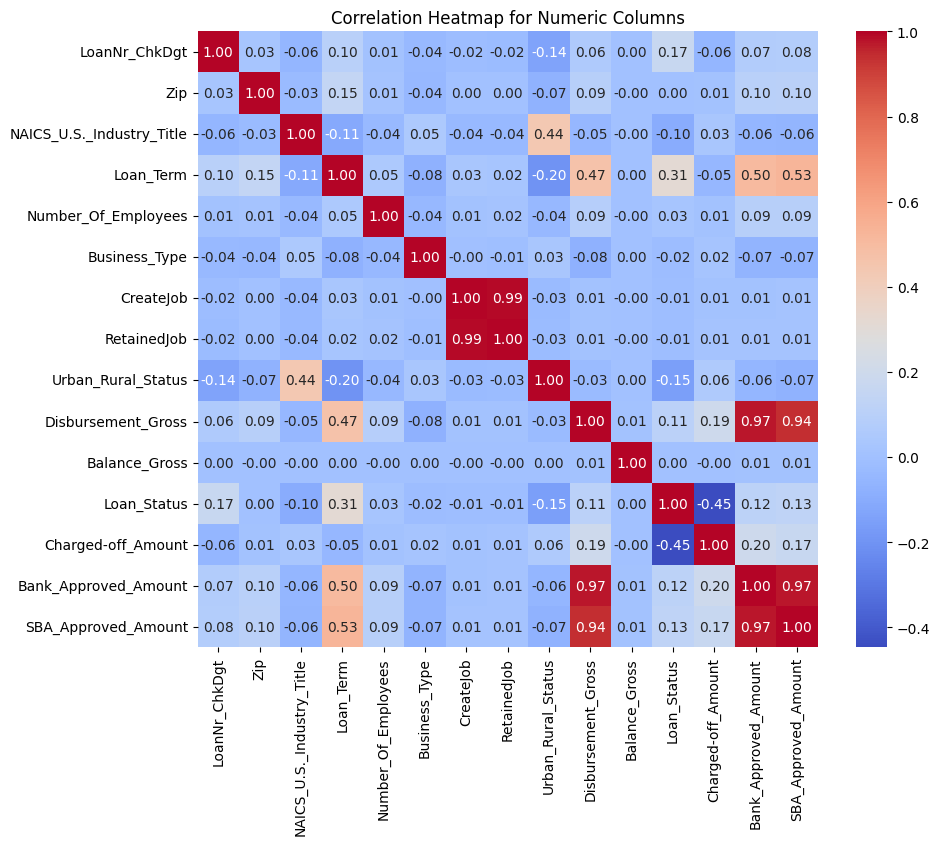

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Show the plot
plt.title("Correlation Heatmap for Numeric Columns")
plt.show()

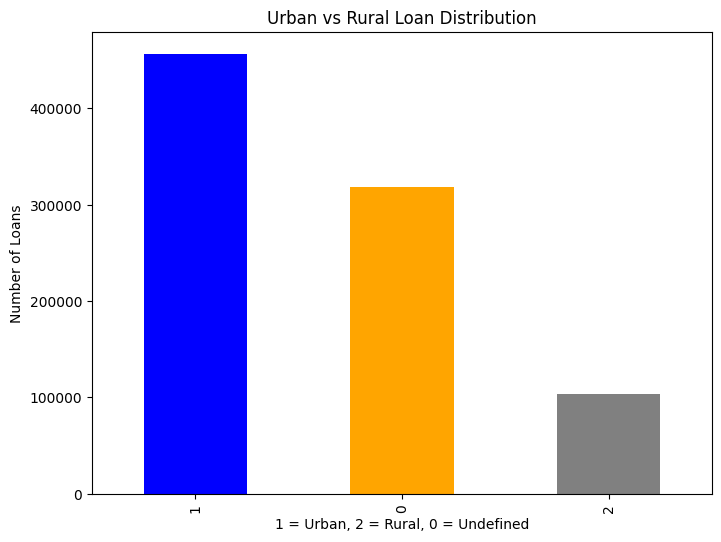

In [ ]:
# Urban vs Rural distribution
urban_rural_counts = df['Urban_Rural_Status'].value_counts()
urban_rural_counts.plot(kind='bar', figsize=(8, 6), color=['blue', 'orange', 'gray'])
plt.title('Urban vs Rural Loan Distribution')
plt.xlabel('1 = Urban, 2 = Rural, 0 = Undefined')
plt.ylabel('Number of Loans')
plt.show()

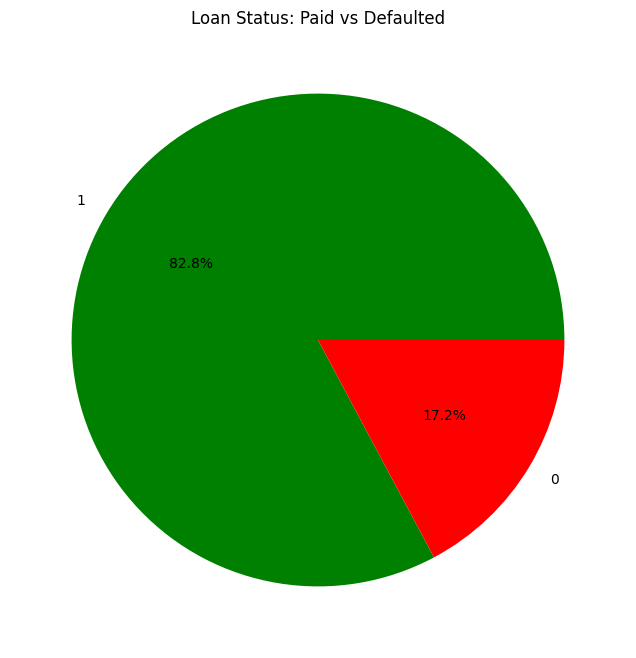

In [ ]:
# Defaulted vs Paid Loans
status_counts = df['Loan_Status'].value_counts()
status_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=['green', 'red'])
plt.title('Loan Status: Paid vs Defaulted')
plt.ylabel('')
plt.show()

In [ ]:
columns_to_drop = ['State', 'Bank_Approved_Amount', 'Balance_Gross', 'Charged-off_Amount', 'Approval_Date', 'LoanNr_ChkDgt', 'City', 'Zip', 'Bank', 'CreateJob', 'RetainedJob', 'ChgOffDate', 'DisbursementDate', 'BankState', 'ApprovalDate', 'SBA_Approved_Amount', 'Fiscal_Year_Approval', 'Name']
df = df.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
df

,NAICS_U.S._Industry_Title,Loan_Term,Number_Of_Employees,Business_Type,Urban_Rural_Status,Revolving_Line_Of_Credit,Low_Documentation_Loan_Program,Disbursement_Gross,Loan_Status,NAICS_prefix,NAICS_US_Industry_Title,ApprovalMonth,DisbursementMonth,Region
0,451120,84,4,2.0,0,0,1.0,60000.0,1,45,Retail Trade,Feb,Feb,Midwest
1,722410,60,2,2.0,0,0,1.0,40000.0,1,72,Accommodation and Food Services,Feb,May,Midwest
2,621210,180,7,1.0,0,0,0.0,287000.0,1,62,Health Care and Social Assistance,Feb,Dec,Midwest
3,0,60,2,1.0,0,0,1.0,35000.0,1,0,Unclassified,Feb,Jun,South
4,0,240,14,1.0,0,0,0.0,229000.0,1,0,Unclassified,Feb,May,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,451120,60,6,1.0,0,0,0.0,70000.0,1,45,Retail Trade,Feb,Sep,Midwest
899160,451130,60,6,1.0,0,1,0.0,85000.0,1,45,Retail Trade,Feb,Oct,Midwest
899161,332321,108,26,1.0,0,0,0.0,300000.0,1,33,Manufacturing,Feb,Sep,West
899162,0,60,6,1.0,0,0,1.0,75000.0,0,0,Unclassified,Feb,Mar,West


In [ ]:
columns_to_drop = ['NAICS_U.S._Industry_Title', 'NAICS_prefix']
df = df.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
df.dropna(subset=['Business_Type', 'Low_Documentation_Loan_Program', 'DisbursementMonth', 'Region'], inplace=True)
df.isna().sum()

,0
Loan_Term,0
Number_Of_Employees,0
Business_Type,0
Urban_Rural_Status,0
Revolving_Line_Of_Credit,0
Low_Documentation_Loan_Program,0
Disbursement_Gross,0
Loan_Status,0
NAICS_US_Industry_Title,0
ApprovalMonth,0


In [ ]:
df

,Loan_Term,Number_Of_Employees,Business_Type,Urban_Rural_Status,Revolving_Line_Of_Credit,Low_Documentation_Loan_Program,Disbursement_Gross,Loan_Status,NAICS_US_Industry_Title,ApprovalMonth,DisbursementMonth,Region
0,84,4,2.0,0,0,1.0,60000.0,1,Retail Trade,Feb,Feb,Midwest
1,60,2,2.0,0,0,1.0,40000.0,1,Accommodation and Food Services,Feb,May,Midwest
2,180,7,1.0,0,0,0.0,287000.0,1,Health Care and Social Assistance,Feb,Dec,Midwest
3,60,2,1.0,0,0,1.0,35000.0,1,Unclassified,Feb,Jun,South
4,240,14,1.0,0,0,0.0,229000.0,1,Unclassified,Feb,May,South
...,...,...,...,...,...,...,...,...,...,...,...,...
899159,60,6,1.0,0,0,0.0,70000.0,1,Retail Trade,Feb,Sep,Midwest
899160,60,6,1.0,0,1,0.0,85000.0,1,Retail Trade,Feb,Oct,Midwest
899161,108,26,1.0,0,0,0.0,300000.0,1,Manufacturing,Feb,Sep,West
899162,60,6,1.0,0,0,1.0,75000.0,0,Unclassified,Feb,Mar,West


In [ ]:
exclude_columns = [
    'Loan_Term', 'Number_Of_Employees', 'Business_Type', 'Uran_Rural_Status',
    'Revolving_Line_Of_Credit','Low_Documentation_Loan_Program',
              'Disbursement_Gross', 'Loan_Status']

#create dummy variables for all cols except those in exclude cols
df_with_dummies = pd.get_dummies(df, columns=[col for col in df.columns if col not in exclude_columns], drop_first=True)

In [ ]:
#convert boolean cols to integer values (0 and 1)
for col in df_with_dummies.select_dtypes(include=['bool']).columns:
    df_with_dummies[col] = df_with_dummies[col].astype(int)

In [ ]:
df_with_dummies

,Loan_Term,Number_Of_Employees,Business_Type,Revolving_Line_Of_Credit,Low_Documentation_Loan_Program,Disbursement_Gross,Loan_Status,Urban_Rural_Status_1,Urban_Rural_Status_2,NAICS_US_Industry_Title_Administrative and Support and Waste Management and Remediation Services,"NAICS_US_Industry_Title_Agriculture, Forestry, Fishing and Hunting","NAICS_US_Industry_Title_Arts, Entertainment, and Recreation",NAICS_US_Industry_Title_Construction,NAICS_US_Industry_Title_Educational Services,NAICS_US_Industry_Title_Finance and Insurance,NAICS_US_Industry_Title_Health Care and Social Assistance,NAICS_US_Industry_Title_Information,NAICS_US_Industry_Title_Management of Companies and Enterprises,NAICS_US_Industry_Title_Manufacturing,"NAICS_US_Industry_Title_Mining, Quarrying, and Oil and Gas Extraction",NAICS_US_Industry_Title_Other Services (except Public Administration),"NAICS_US_Industry_Title_Professional, Scientific, and Technical Services",NAICS_US_Industry_Title_Public Administration,NAICS_US_Industry_Title_Real Estate and Rental and Leasing,NAICS_US_Industry_Title_Retail Trade,NAICS_US_Industry_Title_Transportation and Warehousing,NAICS_US_Industry_Title_Unclassified,NAICS_US_Industry_Title_Utilities,NAICS_US_Industry_Title_Wholesale Trade,ApprovalMonth_Aug,ApprovalMonth_Dec,ApprovalMonth_Feb,ApprovalMonth_Jan,ApprovalMonth_Jul,ApprovalMonth_Jun,ApprovalMonth_Mar,ApprovalMonth_May,ApprovalMonth_Nov,ApprovalMonth_Oct,ApprovalMonth_Sep,DisbursementMonth_Aug,DisbursementMonth_Dec,DisbursementMonth_Feb,DisbursementMonth_Jan,DisbursementMonth_Jul,DisbursementMonth_Jun,DisbursementMonth_Mar,DisbursementMonth_May,DisbursementMonth_Nov,DisbursementMonth_Oct,DisbursementMonth_Sep,Region_Northeast,Region_South,Region_West
0,84,4,2.0,0,1.0,60000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,60,2,2.0,0,1.0,40000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,180,7,1.0,0,0.0,287000.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,60,2,1.0,0,1.0,35000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,240,14,1.0,0,0.0,229000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,60,6,1.0,0,0.0,70000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
899160,60,6,1.0,1,0.0,85000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
899161,108,26,1.0,0,0.0,300000.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
899162,60,6,1.0,0,1.0,75000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
df.to_csv('/content/drive/MyDrive/4210 final project/cleaned_dataset.csv', index=False)
df_with_dummies.to_csv('/content/drive/MyDrive/4210 final project/cleaned_dataset_with_dummies.csv', index=False)